In [2]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt

In [3]:
#load data
digits = load_digits()
data = digits.data

In [15]:
#数据探索
print(data.shape)
print (data.view())

(1797, 64)
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [21]:
#查看第一幅图像
print(digits.target[0])

0


In [26]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


AxesImage(54,36;334.8x217.44)


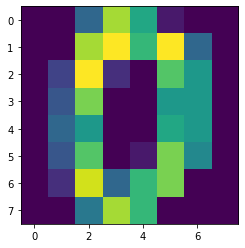

In [27]:
#显示图片下信息
print(plt.imshow(digits.images[0]))

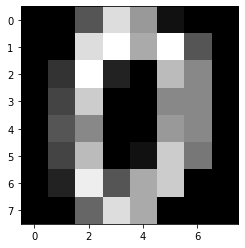

In [29]:
#显示图片下信息
plt.gray()
plt.imshow(digits.images[0])
plt.show()

In [31]:
#分割数据，25%的数据作为测试机，其余作为训练集，random_state：是随机数的种子。随机数的产生取决于种子，
#随机数和种子之间的关系遵从以下两个规则：种子不同，产生不同的随机数；种子相同，即使实例不同也产生相同的随机数。
train_x, test_x, train_y, test_y = train_test_split(data, digits.target, test_size = 0.2, random_state = 33)


In [33]:
test_x.shape

(360, 64)

In [34]:
train_x.shape

(1437, 64)

In [44]:
#采用z-score 规范化
ss = preprocessing.StandardScaler()
#通过fit_transform进行归一化后，存储相同的均值与方差对测试集进行操作
train_ss_x = ss.fit_transform(train_x)
test_ss_x = ss.transform(test_x)

In [48]:
#创建LR分类器
lr = LogisticRegression(solver = 'lbfgs', multi_class = 'auto')
lr.fit(train_ss_x, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
#预测
predict_y = lr.predict(test_ss_x)
print('LR准确率:%0.4lf' % accuracy_score(predict_y, test_y))

LR准确率:0.9667
